In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\User\PyCharmMiscProject\Datasets\StudentsPerformance.csv")
df.head(4)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44


In [41]:
df.isna().sum()
df.duplicated().sum()
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

We might need to take the target variable to predict the continuous regression,
Right now we have "math score, reading score, writing score" we take either one or we might make a new column result and make it a target variable

In [42]:
# df["result"]

df["Result"] = df["math score"] + df["reading score"] + df["writing score"]
df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Result
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


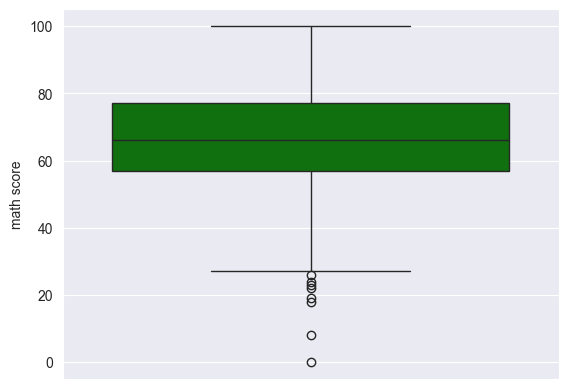

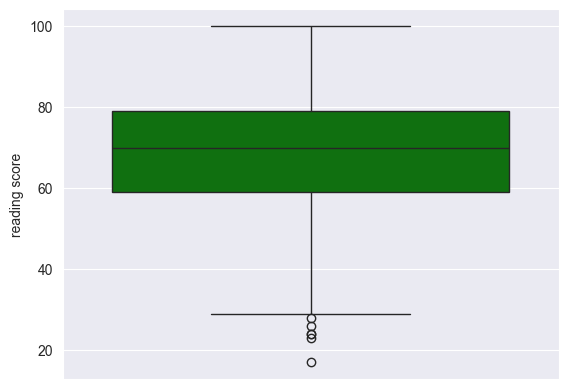

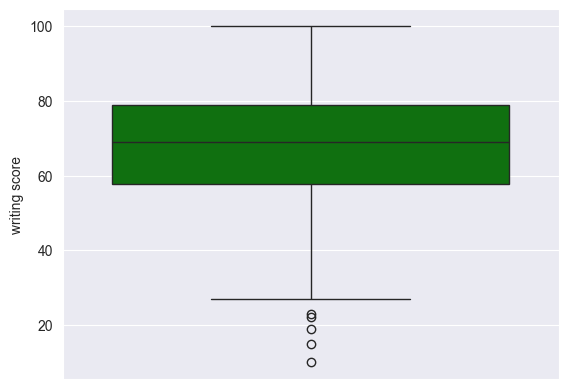

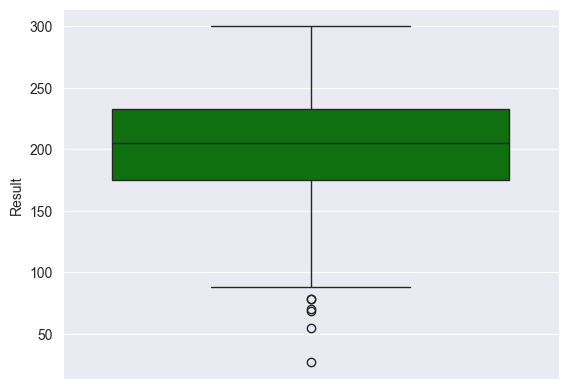

       math score  reading score  writing score       Result
count  1000.00000    1000.000000    1000.000000  1000.000000
mean     66.08900      69.169000      68.054000   203.312000
std      15.16308      14.600192      15.195657    42.771978
min       0.00000      17.000000      10.000000    27.000000
25%      57.00000      59.000000      57.750000   175.000000
50%      66.00000      70.000000      69.000000   205.000000
75%      77.00000      79.000000      79.000000   233.000000
max     100.00000     100.000000     100.000000   300.000000


In [43]:
for col in df.columns:
    if df[col].dtypes != "object":
        sns.boxplot(df[col], color= "green")
        plt.show()
print(df.describe())

The Score might be real, so no need to remove any of the outliers

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])
df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Result
0,0,1,1,1,1,52,44,50,118
1,0,2,4,1,0,49,62,64,147
2,0,1,3,1,1,70,67,69,178
3,1,0,0,0,1,27,29,20,48
4,1,2,4,1,1,56,50,51,129
...,...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,68,70,71,182
996,1,2,2,0,1,42,27,31,72
997,0,2,2,0,0,39,43,41,95
998,0,3,4,1,0,48,50,53,123


In [50]:
x = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'reading score',
       'writing score']]
y = df['Result']


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [52]:
y_pred = lr.predict(x_test)
y_pred

array([110.13799205, 119.3006398 ,  46.20691396,  93.85885767,
       124.29776332, 114.62530111, 109.93944099,  35.55882461,
       155.09460506,  18.17744489,  46.62010148,  99.17390332,
       141.38879956, 144.37067443,  59.55913579,  19.56319531,
        55.76215574, 155.66579125,  60.59524825, 138.58594138,
        82.58847796,  64.48819548, 125.9911493 ,  81.03869653,
        40.62265675,  91.46240128,  72.71804044,  41.16367531,
        93.94490768, 156.08333119, 141.15139746, 163.13291373,
       168.15447827,  76.55081173,  59.22333075, 149.21536203,
       190.52874425,  70.28458247, 125.26371571, 118.23154851,
       102.88513909,  69.105457  , 110.07786878, 125.99001235,
       139.58674915,  73.08166136, 160.65513116,  80.88039213,
       150.63312954,  78.47598065,  16.61606837,  84.9380986 ,
        44.76268449,  73.68399728,  22.92670006, 117.68320944,
        59.48408235,  92.20921358, 131.3668024 ,  83.43095172,
       105.94946129, 130.25191866,  54.78822801, 123.28

In [54]:
df1 = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})
df1

,Actual,Predicted
993,108,110.137992
859,132,119.300640
298,36,46.206914
553,103,93.858858
672,123,124.297763
...,...,...
679,84,86.313640
722,152,152.149353
215,142,137.845874
653,109,104.669893


In [62]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
R2*100

98.11525462763655

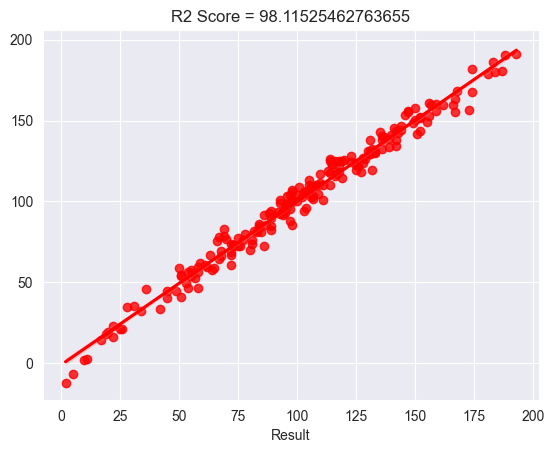

In [64]:
sns.regplot(x=y_test, y=y_pred, color="red")
plt.title(f"R2 Score = {R2*100}")
plt.show()